<a href="https://colab.research.google.com/github/ShadowbladeOO7/Melanoma_Skin_Cancer_Detection_Assignment/blob/main/Melanoma_Skin_Cancer_Detection_Assignment_Upgrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Upgrad and IIITB Assignment on Melanoma Skin Cancer Detection**
### By Jijo Joseph, Baisali Mukherjee & Sweta

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Data Summary:**

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:
1. Actinic keratosis
2. Basal cell carcinoma
3. Dermatofibroma
4. Melanoma
5. Nevus
6. Pigmented benign keratosis
7. Seborrheic keratosis
8. Squamous cell carcinoma
9. Vascular lesion


### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/content/gdrive/MyDrive/'
data_dir_train = pathlib.Path(root_path + 'CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/')
data_dir_test = pathlib.Path(root_path + 'CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2269
142


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2269 files belonging to 9 classes.
Using 1816 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2269 files belonging to 9 classes.
Using 453 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

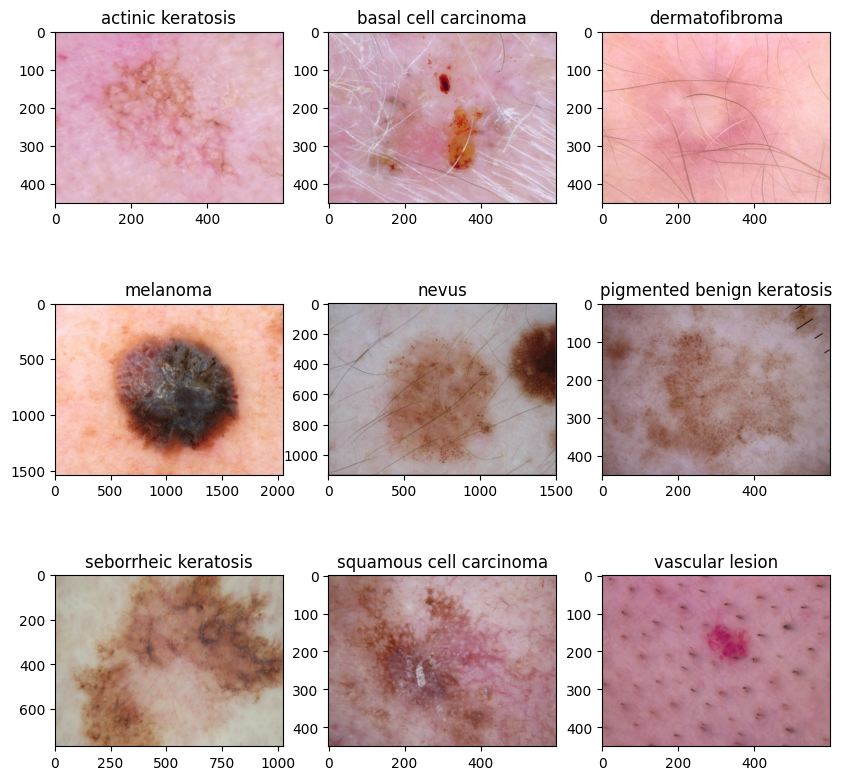

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 [==============================] - 249s 830ms/step - loss: 2.0817 - accuracy: 0.1806 - val_loss: 2.0424 - val_accuracy: 0.1965
Epoch 2/30
57/57 [==============================] - 5s 89ms/step - loss: 2.0220 - accuracy: 0.2175 - val_loss: 2.0075 - val_accuracy: 0.2936
Epoch 3/30
57/57 [==============================] - 5s 87ms/step - loss: 1.9370 - accuracy: 0.2742 - val_loss: 1.8314 - val_accuracy: 0.3289
Epoch 4/30
57/57 [==============================] - 5s 86ms/step - loss: 1.8723 - accuracy: 0.3045 - val_loss: 1.7606 - val_accuracy: 0.3289
Epoch 5/30
57/57 [==============================] - 5s 88ms/step - loss: 1.9420 - accuracy: 0.2583 - val_loss: 1.9499 - val_accuracy: 0.2163
Epoch 6/30
57/57 [==============================] - 5s 87ms/step - loss: 1.8293 - accuracy: 0.3188 - val_loss: 1.7034 - val_accuracy: 0.3444
Epoch 7/30
57/57 [==============================] - 5s 87ms/step - loss: 1.7035 - accuracy: 0.3761 - val_loss: 1.8122 - val_accuracy: 0.3223
Epoch 8/30
57/57 [===

### Visualizing training results

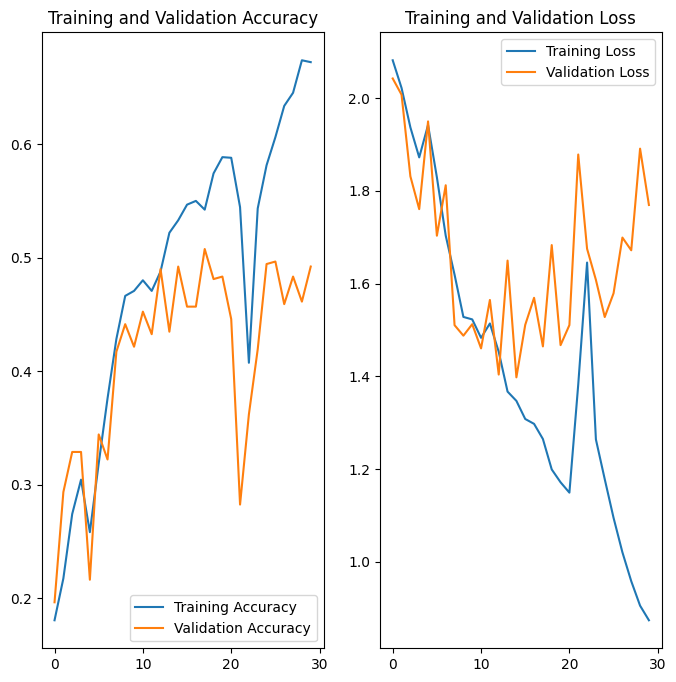

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



**Finding on the first base model**

- The model is overfitting because we can also see difference in loss functions in training & test around the 10-11th epoch

- The accuracy is just around 75-80% because there are enough features to remember the pattern.

- But again, it's too early to comment on the overfitting & underfitting debate



In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

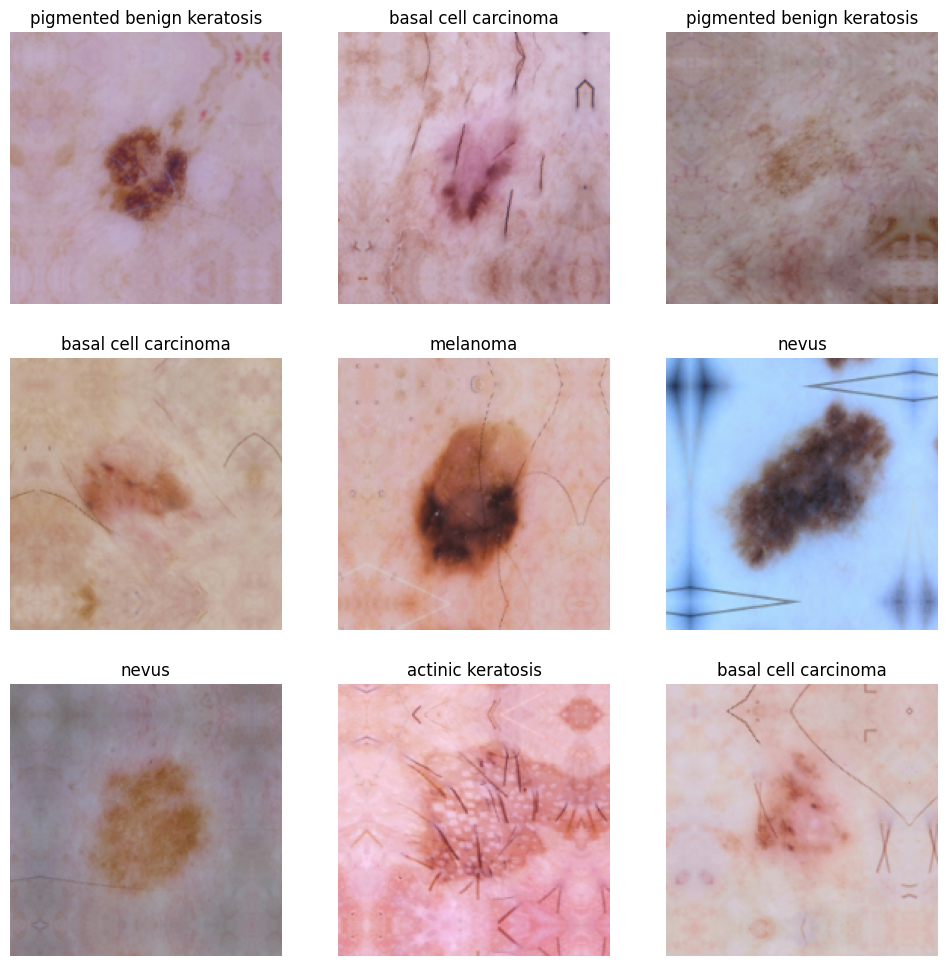

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



### Compiling the model

In [ ]:
### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
57/57 [==============================] - 10s 116ms/step - loss: 2.0733 - accuracy: 0.2043 - val_loss: 2.0420 - val_accuracy: 0.2826
Epoch 2/30
57/57 [==============================] - 6s 97ms/step - loss: 1.9376 - accuracy: 0.2665 - val_loss: 1.8872 - val_accuracy: 0.2870
Epoch 3/30
57/57 [==============================] - 6s 99ms/step - loss: 1.8946 - accuracy: 0.2946 - val_loss: 1.8735 - val_accuracy: 0.2759
Epoch 4/30
57/57 [==============================] - 6s 97ms/step - loss: 1.7982 - accuracy: 0.3420 - val_loss: 1.8654 - val_accuracy: 0.2759
Epoch 5/30
57/57 [==============================] - 6s 98ms/step - loss: 1.8242 - accuracy: 0.3276 - val_loss: 1.7316 - val_accuracy: 0.3466
Epoch 6/30
57/57 [==============================] - 6s 97ms/step - loss: 1.6783 - accuracy: 0.3816 - val_loss: 1.7356 - val_accuracy: 0.3377
Epoch 7/30
57/57 [==============================] - 6s 99ms/step - loss: 1.6456 - accuracy: 0.4097 - val_loss: 1.5571 - val_accuracy: 0.4018
Epoch 8/30


### Visualizing the results

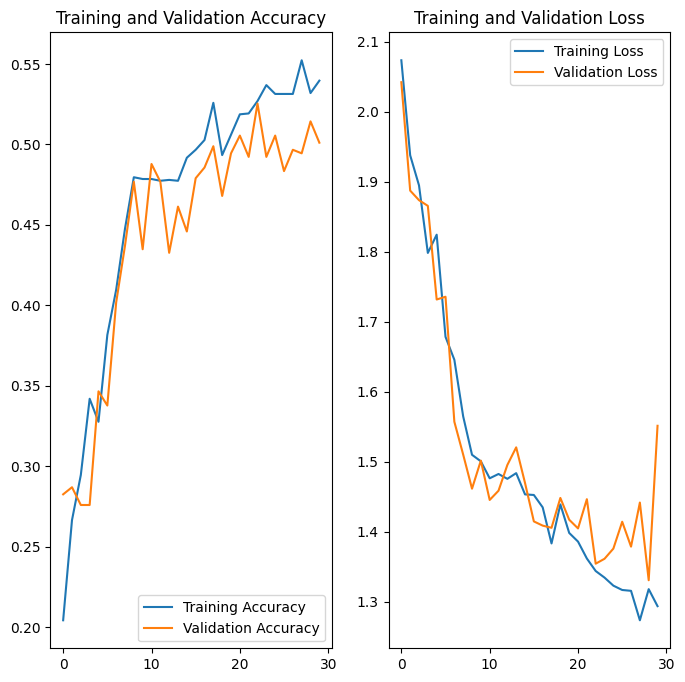

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Finding from Second Model**

- There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation

- We can increase the epochs to increase the accuracy so it's too early for judgement

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
##
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
1,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
2,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
3,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
4,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
...,...,...
2264,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,vascular lesion
2265,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,vascular lesion
2266,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,vascular lesion
2267,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,vascular lesion


In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
1,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
2,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
3,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
4,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
...,...,...
2264,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,vascular lesion
2265,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,vascular lesion
2266,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,vascular lesion
2267,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,vascular lesion


<BarContainer object of 9 artists>

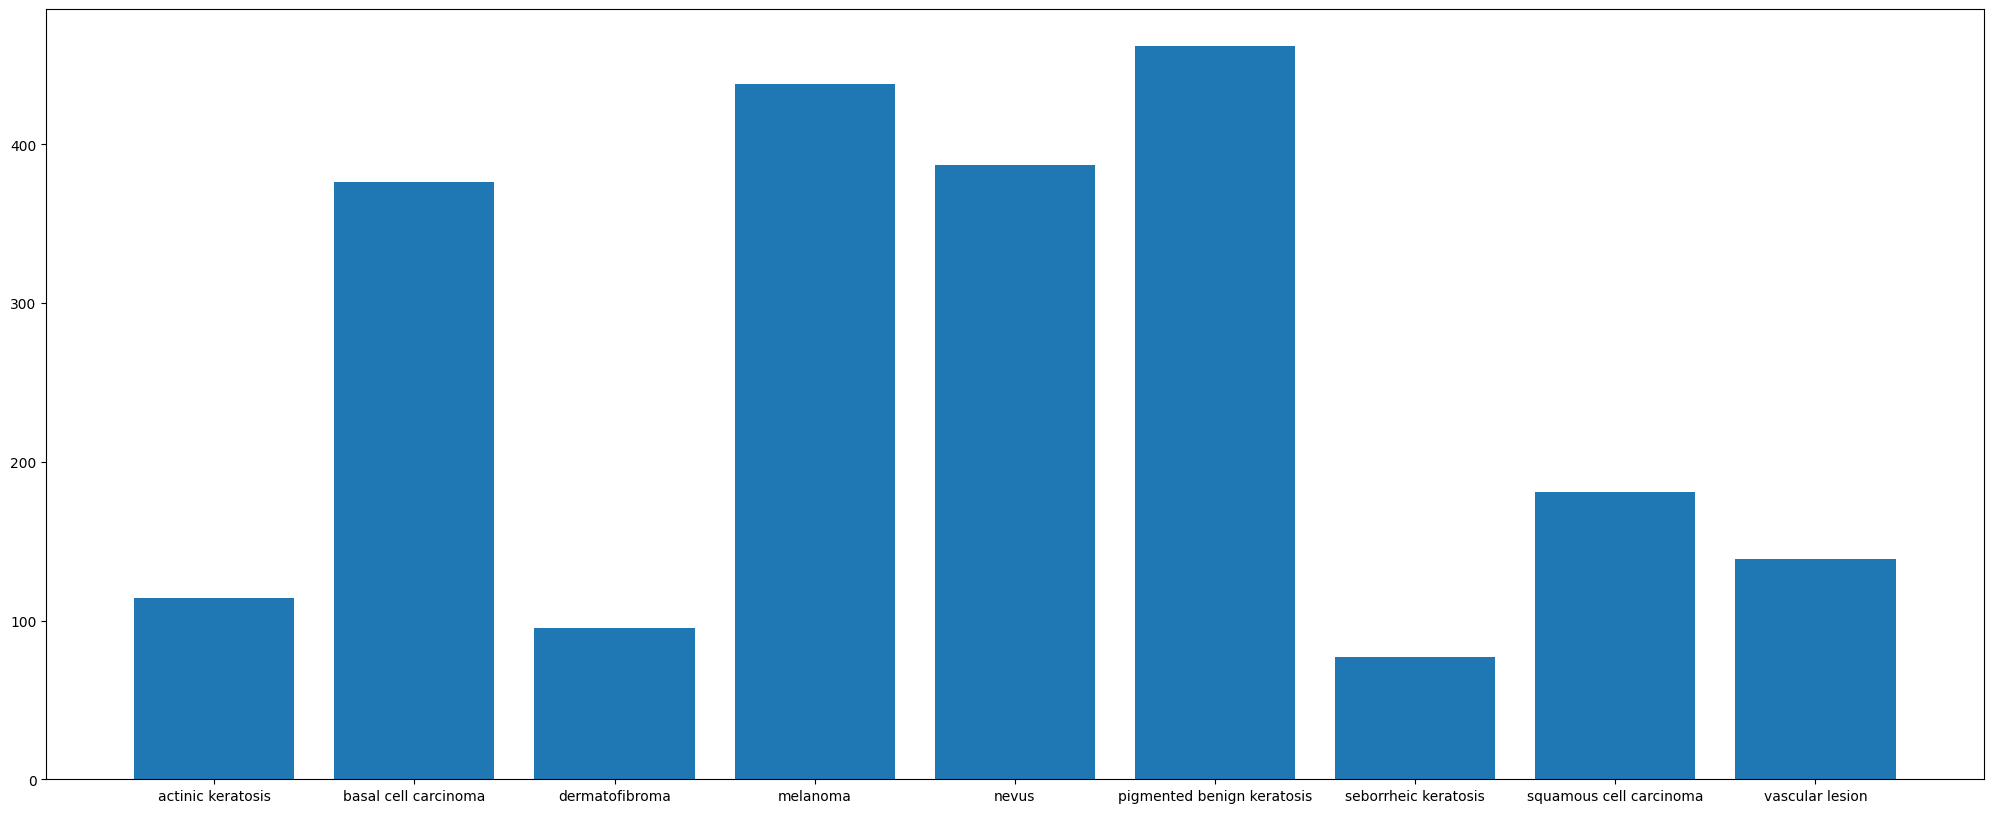

In [ ]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


Answer-1 :- **squamous cell carcinoma** has least number of samples

Answer-2:- **actinic keratosis and dermatofibroma** have proportionate number of classes.
**melanoma and pigmented benign keratosis** have proprtionate number of classes

In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
#path_to_training_dataset="/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2269 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=724x542 at 0x7F03AF089E40>: 100%|██████████| 500/500 [00:58<00:00,  8.49 Samples/s]


Initialised with 2269 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=965x649 at 0x7F0302EB2D40>: 100%|██████████| 500/500 [01:01<00:00,  8.15 Samples/s]


Initialised with 2269 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2583x2096 at 0x7F0321608C70>: 100%|██████████| 500/500 [00:54<00:00,  9.15 Samples/s]


Initialised with 2269 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F032033FDF0>: 100%|██████████| 500/500 [01:02<00:00,  8.06 Samples/s]


Initialised with 2269 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0320FB9510>: 100%|██████████| 500/500 [00:58<00:00,  8.61 Samples/s]


Initialised with 2269 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F030290B5B0>: 100%|██████████| 500/500 [00:53<00:00,  9.42 Samples/s]


Initialised with 2269 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F0302ACC5B0>: 100%|██████████| 500/500 [00:52<00:00,  9.51 Samples/s]


Initialised with 2269 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F03215B0670>: 100%|██████████| 500/500 [00:48<00:00, 10.38 Samples/s]


Initialised with 2269 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0320EBC1C0>: 100%|██████████| 500/500 [00:51<00:00,  9.65 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
data_dir_train1 = pathlib.Path("/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)


4500


In [ ]:
##
for i in class_names:

    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
1,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
2,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
3,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
4,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,actinic keratosis
...,...,...
6764,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,vascular lesion
6765,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,vascular lesion
6766,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,vascular lesion
6767,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    1377
melanoma                      1291
nevus                         1175
basal cell carcinoma          1139
squamous cell carcinoma        523
vascular lesion                406
actinic keratosis              317
dermatofibroma                 293
seborrheic keratosis           248
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
import pathlib
#data_dir_train1=pathlib.Path("/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
data_dir_train1=pathlib.Path("/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")

In [ ]:
data_dir_train1

PosixPath('/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

#### **Todo:** Create a training dataset

In [ ]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2269


In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6769 files belonging to 10 classes.
Using 5416 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6769 files belonging to 10 classes.
Using 1353 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs =50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


170/170 [==============================] - 47s 256ms/step - loss: nan - accuracy: 0.0231 - val_loss: nan - val_accuracy: 0.0229
Epoch 2/50
170/170 [==============================] - 43s 241ms/step - loss: nan - accuracy: 0.0153 - val_loss: nan - val_accuracy: 0.0229
Epoch 3/50
170/170 [==============================] - 46s 262ms/step - loss: nan - accuracy: 0.0153 - val_loss: nan - val_accuracy: 0.0229
Epoch 4/50
170/170 [==============================] - 43s 245ms/step - loss: nan - accuracy: 0.0153 - val_loss: nan - val_accuracy: 0.0229
Epoch 5/50
170/170 [==============================] - 42s 243ms/step - loss: nan - accuracy: 0.0153 - val_loss: nan - val_accuracy: 0.0229
Epoch 6/50
170/170 [==============================] - 43s 244ms/step - loss: nan - accuracy: 0.0153 - val_loss: nan - val_accuracy: 0.0229
Epoch 7/50
170/170 [==============================] - 43s 244ms/step - loss: nan - accuracy: 0.0153 - val_loss: nan - val_accuracy: 0.0229
Epoch 8/50
170/170 [==================

#### **Todo:**  Visualize the model results

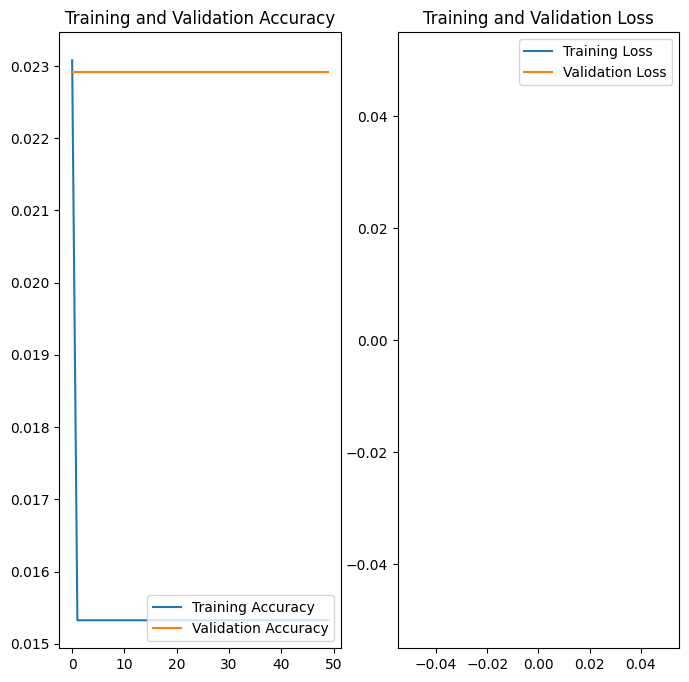

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- The class rebalance helped in reducing overfititng of the data and thus the - loss is beng reduced But it reduced the Acurracy very low

- Initially we tried without the ImageDataGenerator which created data to over fit at high ratio

- Then we introduced dropout and ImageDataGenerator which reduced the over fit

- At last we tried Batch Normalization and Augumentation which really helped in carry forward